### 이미지 파일 확인

In [8]:
import os
file_path = "/Users/nayoungmin/Desktop/Capstone/image"
file_names = [f for f in os.listdir(file_path) if os.path.isdir(os.path.join(file_path, f))]

file_Path = []
# 장소별 데이터 수
for place in file_names:
    PATH = os.path.join(file_path, place)
    print(str(place), ":", str(len(os.listdir(PATH))))
    file_Path.append(PATH)

print(file_Path)


theater : 865
cable_car : 307
cherryblossom : 442
ice_rink : 82
city_river : 791
tower : 318
busy_street : 335
cruise_ship : 366
maple : 341
amusement_park : 348
railway : 434
night_view : 431
nature : 705
sunset : 393
stone_wall : 704
waterpark : 320
castle : 363
aquarium : 334
picnic : 410
building : 454
traditional_culture : 301
['/Users/nayoungmin/Desktop/Capstone/image/theater', '/Users/nayoungmin/Desktop/Capstone/image/cable_car', '/Users/nayoungmin/Desktop/Capstone/image/cherryblossom', '/Users/nayoungmin/Desktop/Capstone/image/ice_rink', '/Users/nayoungmin/Desktop/Capstone/image/city_river', '/Users/nayoungmin/Desktop/Capstone/image/tower', '/Users/nayoungmin/Desktop/Capstone/image/busy_street', '/Users/nayoungmin/Desktop/Capstone/image/cruise_ship', '/Users/nayoungmin/Desktop/Capstone/image/maple', '/Users/nayoungmin/Desktop/Capstone/image/amusement_park', '/Users/nayoungmin/Desktop/Capstone/image/railway', '/Users/nayoungmin/Desktop/Capstone/image/night_view', '/Users/nayoung

## 모듈 불러오기

In [9]:
import tensorflow as tf
import splitfolders   # 입력된 비율을 기준으로 데이터셋을 분할하는 함수
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import AveragePooling2D
from keras.layers  import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
from keras.metrics import AUC
from keras.applications.resnet_v2 import ResNet50V2, ResNet101V2, ResNet152V2, preprocess_input, decode_predictions
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions

## GPU 사용

### 모듈 불러오기

### GPU 확인

In [10]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except:
        print("Cannot set memory growth on device")
    else:
        print("GPU memory growth set to True")
else:
    print("Not enough GPU hardware devices available")


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

GPU memory growth set to True
Num GPUs Available:  1


In [23]:
import splitfolders   # 입력된 비율을 기준으로 데이터셋을 분할하는 함수
input_folder = "/Users/nayoungmin/Desktop/Capstone/image"
output = "/Users/nayoungmin/Desktop/Capstone/splited_image_is" # where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=777, ratio=(0.7,0.1, 0.2))

In [24]:
import os

file_path = '/Users/nayoungmin/Desktop/Capstone/splited_image_is'
file_names = [f for f in os.listdir(file_path) if not f.startswith('.')]  # 숨김파일 제외

for data in file_names:
    PATH = os.path.join(file_path,data)
    plan_file = [f for f in os.listdir(PATH) if not f.startswith('.')]  # 숨김파일 제외
    print("[",str(data),"data ]")
    print()
    for plan in plan_file:
        PATH_ = os.path.join(PATH,plan)
        print(str(plan)," : ",str(len(os.listdir(PATH_))))
    print()

[ test data ]

theater  :  174
cable_car  :  63
cherryblossom  :  89
ice_rink  :  17
city_river  :  158
tower  :  65
busy_street  :  68
cruise_ship  :  74
maple  :  69
amusement_park  :  71
railway  :  87
night_view  :  87
nature  :  142
sunset  :  79
stone_wall  :  141
waterpark  :  64
castle  :  73
aquarium  :  68
picnic  :  83
building  :  91
traditional_culture  :  61

[ train data ]

theater  :  691
cable_car  :  245
cherryblossom  :  352
ice_rink  :  65
city_river  :  632
tower  :  253
busy_street  :  268
cruise_ship  :  292
maple  :  272
amusement_park  :  278
railway  :  346
night_view  :  344
nature  :  563
sunset  :  314
stone_wall  :  562
waterpark  :  256
castle  :  290
aquarium  :  267
picnic  :  327
building  :  362
traditional_culture  :  240

[ val data ]

theater  :  260
cable_car  :  93
cherryblossom  :  133
ice_rink  :  25
city_river  :  237
tower  :  96
busy_street  :  101
cruise_ship  :  110
maple  :  103
amusement_park  :  105
railway  :  130
night_view  :  130
na

In [25]:
import os
import shutil
from pathlib import Path
from sklearn.metrics import classification_report
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.metrics import AUC
from keras.callbacks import EarlyStopping  
from tensorflow.keras.applications.resnet import preprocess_input


FILE_PATH = '/Users/nayoungmin/Desktop/Capstone/splited_image_is'
TRAIN_PATH = FILE_PATH + '/train'
VAL_PATH = FILE_PATH + '/val'
TEST_PATH = FILE_PATH +'/test'

# Set the hyperparameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 256
N_EPOCH = 30
LR = 0.005

In [26]:
trainGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
valGen = ImageDataGenerator(
    rescale=1./255)
testGen = ImageDataGenerator(
    rescale=1./255)

train_generator = trainGen.flow_from_directory(
    TRAIN_PATH,
    class_mode="categorical",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    batch_size=BATCH_SIZE)

validation_generator = valGen.flow_from_directory(
    VAL_PATH,
    class_mode="categorical",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
    batch_size=BATCH_SIZE)

    # initialize the testing generator
test_generator = testGen.flow_from_directory(
    TEST_PATH,
    class_mode="categorical",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
    batch_size=BATCH_SIZE)

# ResNet50V2 모델을 불러오고, 그 모델의 출력을 활용하여 새로운 fully connected layer를 추가
resnet = ResNet50V2(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))

x = resnet.output
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x =  Dense(512, activation='relu', input_dim= (224,224,3))(x)
x = BatchNormalization()(x)
x =  Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x =  Dense(128, activation='relu')(x) # 새로운 Dense 레이어 추가
x = BatchNormalization()(x)
x =  Dense(21, activation='softmax')(x)
    
model = Model(inputs=resnet.input, outputs=x)

Found 7219 images belonging to 21 classes.
Found 2720 images belonging to 21 classes.
Found 1824 images belonging to 21 classes.


In [ ]:
import matplotlib.pyplot as plt

# train 이미지 확인하기
print('================train_image================')
for _ in range(2):
    img, label = train_generator.next()
    print(img.shape)   #  (1,224,224,3) = (이미지의 개수, 높이, 너비, 채널 수)  / RGB 색상 채널이 3개 있으므로 3이다.
    #print(label)
    plt.title('train_image')
    plt.imshow(img[0])
    plt.show()

labels = validation_generator.classes
print(labels)


# validation 이미지 확인하기
print('================validation_image================')
for _ in range(2):
    img, label = validation_generator.next()
    print(img.shape)   #  (1,224,224,3) = (이미지의 개수, 높이, 너비, 채널 수)  / RGB 색상 채널이 3개 있으므로 3이다.
    #print(label)
    plt.title('validation_image')
    plt.imshow(img[0])
    plt.show()

labels = validation_generator.classes
print(labels)



# test 이미지 확인하기
print('================test_image================')
for _ in range(2):
    img, label = test_generator.next()
    print(img.shape)   #  (1,224,224,3) = (이미지의 개수, 높이, 너비, 채널 수)  / RGB 색상 채널이 3개 있으므로 3이다.
    # print(label)
    plt.title('test_image')
    plt.imshow(img[0])
    plt.show()

labels = test_generator.classes
print(labels)

### base_model

In [27]:
from keras.layers import AveragePooling2D
from keras.layers  import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse

from keras.metrics import AUC

from keras.applications.resnet_v2 import ResNet50V2, ResNet101V2, ResNet152V2, preprocess_input, decode_predictions
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions


# ResNet50V2 모델을 불러오고, 그 모델의 출력을 활용하여 새로운 fully connected layer를 추가
resnet = ResNet50V2(include_top=False, weights='imagenet', input_shape = (224,224,3))

x = resnet.output
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dropout(0.25)(x)
x =  Dense(512, activation='relu', input_dim= (224,224,3))(x)
x = BatchNormalization()(x)
x =  Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x =  Dense(21, activation='softmax')(x)  # 여기에서 Dense를 class 수에 맞게 설정해야 함.

model = Model(inputs=resnet.input, outputs=x)

# 기존 학습된 layer들을 freazing(새로운 layer들만 학습하도록)
for layer in resnet.layers:
   layer.trainable = False

# define the learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch > 0 and epoch % 10 == 0:
        lr = lr * 0.1
    return lr

# compile the model with the learning rate scheduler
opt = Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy",AUC(multi_label=True,num_labels=21,name='AUC')])

# train the model
H = model.fit_generator(
    generator = train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=N_EPOCH,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)]
)

#model.save('my_model.h5')

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_1778/1612152833.py:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/30
28/28 [==============================] - 55s 2s/step - loss: 0.8292 - accuracy: 0.7630 - AUC: 0.9716 - val_loss: 0.8130 - val_accuracy: 0.8277 - val_AUC: 0.9226 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/30
28/28 [==============================] - 53s 2s/step - loss: 0.3604 - accuracy: 0.8864 - AUC: 0.9943 - val_loss: 0.3807 - val_accuracy: 0.8969 - val_AUC: 0.9415 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/30
28/28 [==============================] - 53s 2s/step - loss: 0.2708 - accuracy: 0.9140 - AUC: 0.9961 - val_loss: 0.2627 - val_accuracy: 0.9184 - val_AUC: 0.9466 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/30
28/28 [==============================] - 54s 2s/step - loss: 0.2373 - accuracy: 0.9270 - AUC: 0.9968 - val_loss: 0

In [28]:
# 모델 저장
MODEL_PATH = '/Users/nayoungmin/Desktop/Capstone/model'
model.save(os.path.join(MODEL_PATH, 'Plan_it.h5'))

## 이미지 분류
- image_predict 파일 따로 올려놓음

In [39]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator


# 추천 여행지 파일
recommend_csv = pd.read_csv('/Users/nayoungmin/Desktop/Capstone/recommend.csv')


# 저장한 모델 파일 경로
model_path = '/Users/nayoungmin/Desktop/Capstone/model/Plan_it.h5'
TRAIN_PATH = '/Users/nayoungmin/Desktop/Capstone/splited_image_is/train'
# 저장한 모델 불러오기
model = load_model(model_path)

# 이미지 클래스 이름 지정해주기
classGen = ImageDataGenerator()

class_generator = classGen.flow_from_directory(
    directory=TRAIN_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

while(True):
    img_path = input('이미지를 넣어주세요: ') # 예측하고자 하는 이미지 경로
    if img_path == '종료':
        break
    target_size = (224, 224) # 모델이 학습시킨 이미지 사이즈와 동일하게 설정

    # 이미지 전처리
    img = load_img(img_path, target_size=target_size)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0 # 이미지 스케일링

    # 예측
    preds = model.predict(x)

    # 클래스 이름 받는 Dictionary 만들기
    pre_dict = {}

    # 클래스별 확률 값 출력
    class_indices = class_generator.class_indices
    class_names = list(class_indices.keys())
    
    
    for i in range(len(class_names)):
        pre_dict[class_names[i]] = round(preds[0][i]*100, 2)        
    
    sorted_pre_dict = sorted(pre_dict.items(), key=lambda x: x[1], reverse=True)

    for key, value in sorted_pre_dict:
        print(f"{key}: {value}%")

    if max(pre_dict.values()) < 40:
        print('\n\n다른 사진을 업로드 해주세요!\n\n')
        continue
    else:
        max_pre = max(pre_dict, key=pre_dict.get)
        #print('카테고리: ', max_pre)
        #print(max_pre)
        
        
    #input_rec = input('카테고리: ')
    print(recommend_csv.loc[recommend_csv['category']==max_pre, :])


Found 7219 images belonging to 21 classes.
이미지를 넣어주세요: /Users/nayoungmin/Desktop/Capstone/이미지예상/숲길.jpeg


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x2e8405ea0>

### 성능 시각화
- 정확도
- AUC
- Loss
- Validation 성능 확인
- Test 성능 확인
- class별 AUC

### AUC 시각화

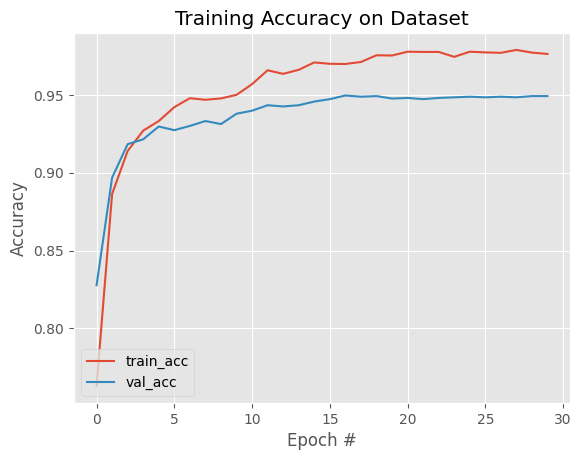

In [29]:
# plot the training loss and accuracy
# construct the argument parser and parse the arguments

# ap = argparse.ArgumentParser()
# ap.add_argument("-h", "--plot", type=str, default="plot.png",
# 	help="path to output loss/accuracy plot")
# args = vars(ap.parse_args())
import matplotlib.pyplot as plt
import easydict

args = easydict.EasyDict({
        "plot" : 'plot.png',
    })

N = N_EPOCH
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

# plt.plot(np.arange(0, N), H.history["AUC"], label="train_AUC")
# plt.plot(np.arange(0, N), H.history["val_AUC"], label="val_AUC")
plt.title("Training Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

### AUC 시각화

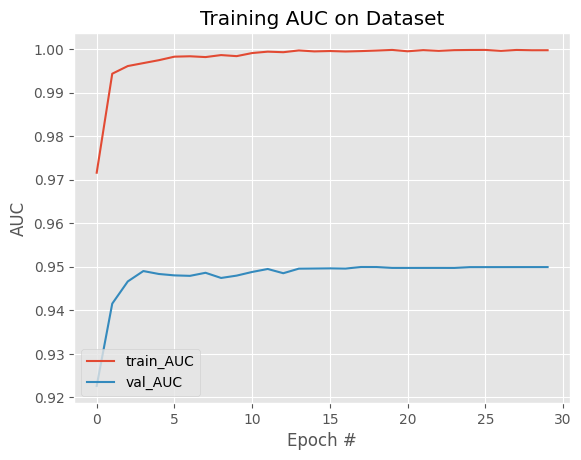

In [30]:
# plot the training loss and accuracy
# construct the argument parser and parse the arguments

# ap = argparse.ArgumentParser()
# ap.add_argument("-h", "--plot", type=str, default="plot.png",
# 	help="path to output loss/accuracy plot")
# args = vars(ap.parse_args())
import easydict

args = easydict.EasyDict({
        "plot" : 'plot.png',
    })

N = N_EPOCH
plt.style.use("ggplot")
plt.plot(np.arange(0, N), H.history["AUC"], label="train_AUC")
plt.plot(np.arange(0, N), H.history["val_AUC"], label="val_AUC")
plt.title("Training AUC on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("AUC")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

### Loss값 시각화

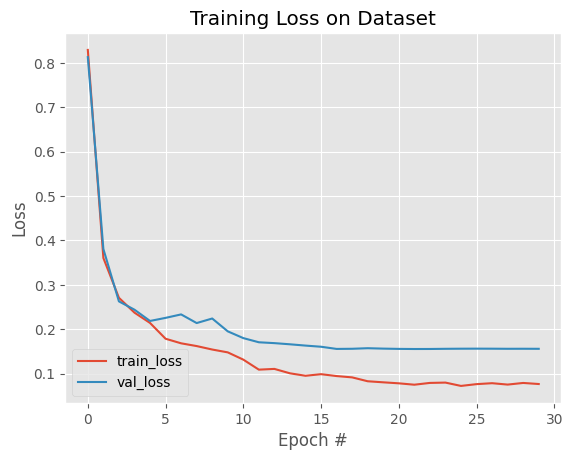

In [32]:
# plot the training loss and accuracy
# construct the argument parser and parse the arguments

# ap = argparse.ArgumentParser()
# ap.add_argument("-h", "--plot", type=str, default="plot.png",
# 	help="path to output loss/accuracy plot")
# args = vars(ap.parse_args())
import easydict

args = easydict.EasyDict({
        "plot" : 'plot.png',
    })

N = N_EPOCH
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")

# plt.plot(np.arange(0, N), H.history["AUC"], label="train_AUC")
# plt.plot(np.arange(0, N), H.history["val_AUC"], label="val_AUC")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

### validation 성능

In [33]:
loss, accuracy, AUC = model.evaluate_generator(validation_generator,steps =validation_generator.samples // BATCH_SIZE+1)
print('Validation accuracy :', accuracy)
print('Validation AUC :',AUC)
print('Validation Loss :',loss)

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_1778/447502406.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy, AUC = model.evaluate_generator(validation_generator,steps =validation_generator.samples // BATCH_SIZE+1)


Validation accuracy : 0.9411764740943909
Validation AUC : 0.9963104724884033
Validation Loss : 0.18014685809612274


### test 성능

In [34]:
from keras.utils import to_categorical
from sklearn.metrics import f1_score, precision_score, recall_score


# Get the predictions for the test set
predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)

# Convert the predictions and true labels into one-hot encoded form
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
y_pred_onehot = to_categorical(train_generator.labels)

# Compute the evaluation metrics
loss, accuracy, auc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
f1_score = f1_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

# Print the evaluation metrics
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test AUC:", auc)
print("Test F1 score:", f1_score)
print("Test precision:", precision)
print("Test recall:", recall)


/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_1778/524487126.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


8/8 [==============================] - 7s 890ms/step


/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_1778/524487126.py:14: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy, auc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)


8/8 [==============================] - 7s 832ms/step - loss: 0.2546 - accuracy: 0.9167 - AUC: 0.9942
Test loss: 0.2546120584011078
Test accuracy: 0.9166666865348816
Test AUC: 0.9941633343696594
Test F1 score: 0.9129331881388917
Test precision: 0.9177953518889574
Test recall: 0.9097813558847796


In [35]:
test_generator.classes

array([ 0,  0,  0, ..., 20, 20, 20], dtype=int32)

In [36]:
targets = test_generator.class_indices.keys()

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_1778/1078514530.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator, test_generator.samples // BATCH_SIZE+1)


ROC AUC score: 0.9527914679177313


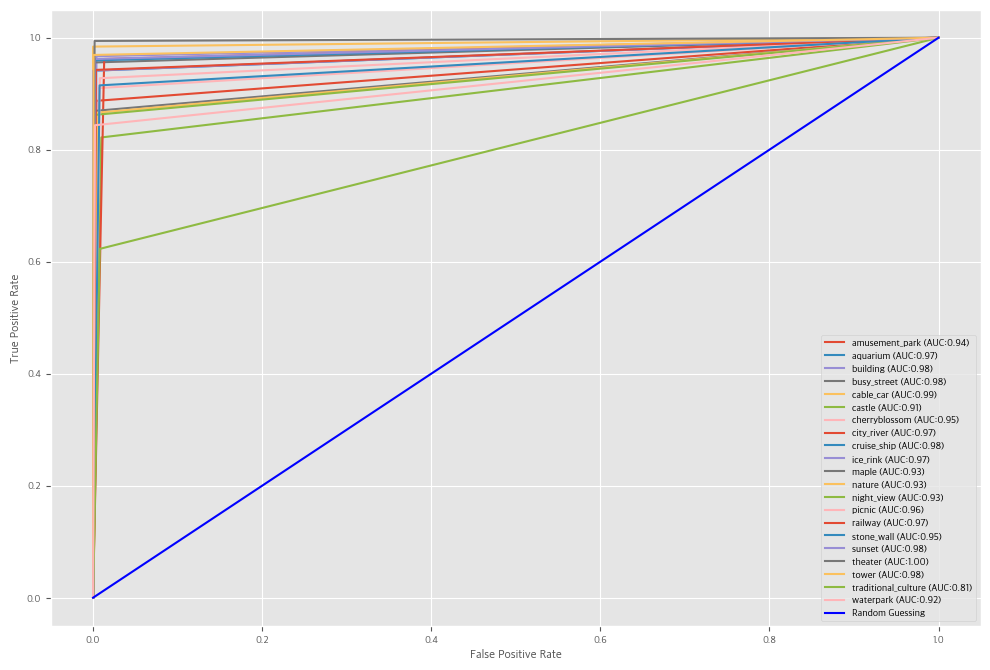

In [37]:
from sklearn.metrics import multilabel_confusion_matrix

Y_pred = model.predict_generator(test_generator, test_generator.samples // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)

y_test = test_generator.classes

import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.font_manager as fm

import matplotlib as mpl
from matplotlib import font_manager, rc

font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc' # Mac에서 사용하는 기본 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams["font.size"] = 7  # 폰트 크기 설정


target= targets

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()